<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/Fuel_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calling libraries  and dataset 

In [1]:
#loaded data
import pandas as pd
url = 'https://raw.githubusercontent.com/sivaramambikasaran/Data_driven_Kinetics/master/data/Alkane_Dataset_full_stanford_AR.csv?token=AINCVGUITKDVFRUDJQI7RZS6HP64A'
df = pd.read_csv(url)# Dataset is now stored in a Pandas Dataframe
print(df.columns)
# df = df.loc[:10,:]
print(df)

Index(['Fuel', 'T(K)', 'T_Error(%)', 'P(atm)', 'P_Error(%)', 'Fuel(%)',
       'Oxidizer(%)', 'Diluant(%)', 'Equv(phi)', 'Diluant Type', 'Time(μs)',
       'Mode_of_measurement', 'Species_name', 'Species_measurement_Error',
       'Measured_wavelength(nm)', 'Shocktube_dia(cm)', 'Research_group',
       'Data_Source'],
      dtype='object')
         Fuel  ...                                        Data_Source
0    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
1    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
2    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
3    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
4    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
..        ...  ...                                                ...
444   CCCCCCC  ...                                n_heptane_oxidation
445   CCCCCCC  ...                                n_heptane_oxidation
446   CCCCCCC  ...          

In [2]:
print(df['Fuel'] )

0      CCCCCCCC
1      CCCCCCCC
2      CCCCCCCC
3      CCCCCCCC
4      CCCCCCCC
         ...   
444     CCCCCCC
445     CCCCCCC
446     CCCCCCC
447     CCCCCCC
448     CCCCCCC
Name: Fuel, Length: 449, dtype: object


#Fucntion for finding the S_H bonds

In [0]:
def find_chain_length(fuel_data):
  '''
  This method will return the number of double bonds in the alkanes
  Input: list of fuel
  output : fuel S_H bond array 
  '''
  S_H = np.zeros(len(fuel_data))
  #number bonds in the alkanes are (2n-2) for C>3 (S_H)
  for i in range(len(fuel_data)):
    S_H_count = 2*(len(fuel_data[i])-2) #count by fuel length
    S_H[i] = S_H_count
  return S_H

# #check fucntion
# print(find_chain_length(['CCC','CCCC']))


#Required columns from data

In [4]:
#calling library
import pandas as pd
import numpy as np

data = pd.DataFrame([]) #Empty DataFrame

#required data
data['S_H'] = find_chain_length(list(df['Fuel']))
data['T(K)'] = df['T(K)']
data['P(atm)'] = df['P(atm)']
data['Fuel(%)'] = df['Fuel(%)']
data['Oxidizer(%)'] = df['Oxidizer(%)']
data['Diluant(%)'] = df['Diluant(%)']
data['Equv(phi)'] = df['Equv(phi)']
data['Time(μs)'] = df['Time(μs)']
print(data)

      S_H  T(K)  P(atm)  Fuel(%)  Oxidizer(%)  Diluant(%)  Equv(phi)  Time(μs)
0    12.0  1325   1.950     0.32         4.00       95.68        1.0       859
1    12.0  1265   2.050     0.32         4.00       95.68        1.0      1569
2    12.0  1289   2.010     0.32         4.00       95.68        1.0      1198
3    12.0  1385   1.960     0.32         4.00       95.68        1.0       390
4    12.0  1455   1.870     0.32         4.00       95.68        1.0       166
..    ...   ...     ...      ...          ...         ...        ...       ...
444  10.0  1378   2.326     0.03         0.33       99.64        1.0      1330
445  10.0  1494   2.155     0.03         0.33       99.64        1.0      1330
446  10.0  1494   2.155     0.03         0.33       99.64        1.0       308
447  10.0  1502   2.262     0.03         0.33       99.64        1.0       280
448  10.0  1506   2.360     0.03         0.33       99.64        1.0       189

[449 rows x 8 columns]


# Conversion of data into the log or other form to frame the corelation 

In [5]:
converted_data  = pd.DataFrame([]) #Empty DataFrame
T_0 = 1000
# conversion of parameters for the equation 
converted_data['const'] = np.ones(df.shape[0])
converted_data['T0/T'] = T_0 / df['T(K)'] 
# converted_data['1/S_H'] = 1/find_chain_length(list(df['Fuel']))
converted_data['T0/T*S_H'] = converted_data['T0/T']/find_chain_length(list(df['Fuel']))
# converted_data['T0/T*S_H^2'] = converted_data['T0/T']/(find_chain_length(list(df['Fuel']))**2)
# converted_data['T0/T*S_H^3'] = converted_data['T0/T']/(find_chain_length(list(df['Fuel']))**3)
# converted_data['log_T'] = np.log(df['T(K)'])
converted_data['log_P'] = np.log(df['P(atm)'])
converted_data['log_Fuel'] = np.log(df['Fuel(%)'])
converted_data['log_oxi'] = np.log(df['Oxidizer(%)'])
# converted_data['log_Dilu'] = np.log(df['Diluant(%)'])
# converted_data['log_Equi'] = np.log(df['Equv(phi)'])
converted_data['log_Time'] = np.log(df['Time(μs)'])
converted_data.columns

Index(['const', 'T0/T', 'T0/T*S_H', 'log_P', 'log_Fuel', 'log_oxi',
       'log_Time'],
      dtype='object')

#Defining matrix X and actual result y - ($\log \tau$)

In [6]:
#defi
X = converted_data.iloc[:,:-1]
y =  converted_data.iloc[:,-1]
print(y)

0      6.755769
1      7.358194
2      7.088409
3      5.966147
4      5.111988
         ...   
444    7.192934
445    7.192934
446    5.730100
447    5.634790
448    5.241747
Name: log_Time, Length: 449, dtype: float64


#Scaling

In [0]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)
# print(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train)

     const      T0/T  T0/T*S_H     log_P  log_Fuel   log_oxi
365    1.0  0.753580  0.047099  0.524729 -3.399199 -0.207024
101    1.0  0.873362  0.436681  4.158883 -0.223144  2.079442
442    1.0  0.730994  0.073099  1.050822 -3.506558 -1.108663
78     1.0  1.025641  0.512821  3.063391 -0.223144  2.079442
33     1.0  0.810373  0.405186  1.944481 -0.223144  2.079442
..     ...       ...       ...       ...       ...       ...
106    1.0  1.004016  0.502008  4.001864 -0.223144  2.079442
270    1.0  0.828500  0.059179  2.720637 -0.916291  1.386294
348    1.0  0.680272  0.042517  0.207014 -1.609438  1.131402
435    1.0  0.684463  0.068446  0.512824 -2.995732 -0.597837
102    1.0  0.914913  0.457457  4.014580 -0.223144  2.079442

[404 rows x 6 columns]


#Regression
To solve $X\beta= y$

$X^TX \beta= X^Ty$

Now decomposing matrix using QR decomposition \
taking, $X = QR$

$(QR)^T(QR) \beta= (QR)^Ty$

$( R^T Q^T Q R) \beta= (QR)^Ty$

$( R^T R) \beta= R^T Q^Ty$

$ (R^T)^{-1} R^T R \beta=  Q^Ty$

$ R \beta=  Q^Ty$

$ R \beta=  z$

As R is upper triangular which can be solved by back substituion.

Check : https://adrianstoll.com/linear-algebra/least-squares.html


In [9]:
#Find parameters by regression using least-square formula (XT X)^-1 XT 
import scipy as sp

def back_substitution(A,b):
  '''
  This method will de backsubstitution
  '''
  n = A.shape[1] #no_of_par
  print(n)
  x = np.zeros(A.shape[1]) #weights = no of parameter = colm
  #last elements
  for i in range(n-1, -1, -1):
      for j in range (i, n, 1):
          b[i] -= A[i, j]*x[j]
      x[i] = b[i] / A[i,i]
  return x

def regression(X,y):
  '''
  This method will best fit using QR factorization
  '''
  if(X.shape[1] < X.shape[0]):
    '''
    solving overdetermined system
    '''
    Q,R = sp.linalg.qr(X)
    #solve 
    z = np.matmul(np.transpose(Q),y)
    #back-substitution
    beta = back_substitution(R,z)
    return beta
  else:
    exit()


# #test-1
# M = np.matrix([[1,-1,2],[0,-1,-2],[0,0,-6],[9,1,2],[7,4,1]])
# c = np.array([2,5,3,8,3])
# #ans : [ 1.27408155 -1.53528339 -0.61609186]

# #test-2
# #test-1
# M = np.matrix([[1,-1,2],[0,-1,-2],[0,0,-6],[9,1,2],[7,4,1]])
# c = np.array([2,5,3,3,3])
# #ans : [ 1.27408155 -1.53528339 -0.61609186]

# coef = regression(M,c)
# print(coef)
coef = regression(X_train,y_train)

#Coefficent table 
coef_result = pd.DataFrame([])
coef_result['para_coef'] = X.columns
coef_result['coef'] = coef
print(coef_result)


6
  para_coef       coef
0     const  -2.871787
1      T0/T  12.280119
2  T0/T*S_H   3.463250
3     log_P  -0.525825
4  log_Fuel  -0.162243
5   log_oxi  -0.255531


#If
The functional form is,

$\log \tau = \beta_0 + \beta_1  \log{P} + \beta_2 \log{Fuel} + \beta_3 \log{Oxi} + \beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}$


$\tau = exp(\beta_0')  {P}^{\beta_1}  {Fuel}^{\beta_2}   {Oxi}^{\beta_3} \exp\bigg(\beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}\bigg)$

$\tau = \beta_0'  {P}^{\beta_1}  {Fuel}^{\beta_2}   {Oxi}^{\beta_3} \exp\bigg(\beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}\bigg)$


#Prediction:


In [10]:
y_hat_train = X_train.dot(coef)
print(y_hat_train)

365    6.873856
101    6.683542
442    6.657734
78     9.393267
33     6.965335
         ...   
106    8.596792
270    5.871089
348    5.492441
435    6.139690
102    7.341617
Length: 404, dtype: float64


#Comparision $Y_{predicted}$  vs $Y_{actual}$


        y_act    y_pred
365  6.873856  7.002156
101  6.683542  6.272877
442  6.657734  7.501082
78   9.393267  8.619750
33   6.965335  6.845880
..        ...       ...
106  8.596792  7.904704
270  5.871089  5.723585
348  5.492441  5.192957
435  6.139690  5.902633
102  7.341617  6.907755

[404 rows x 2 columns]


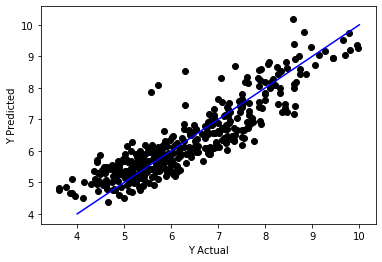

In [11]:
compare = pd.DataFrame([])
compare['y_act'] = y_hat_train
compare['y_pred'] = y_train
print(compare)

#plotting of train set
import matplotlib.pyplot as plt
center_data = np.linspace(4,10,100)
plt.plot(center_data,center_data,'b')
plt.scatter(y_train,y_hat_train,c='black')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.show()


#Maximum Relative Error in Training



In [12]:
max_relative_error = np.max(np.abs(y_train - y_hat_train)/np.abs(y_train))
print(max_relative_error)

0.4146549141097059


#Testing set


        y_act    y_pred
285  7.404772  7.201171
296  6.490219  7.498316
117  7.849960  7.605890
347  4.996780  3.688879
70   7.431326  7.265430
30   6.471324  5.991465
192  5.404038  4.736198
79   9.330186  8.470102
364  5.586327  5.472271
357  5.031218  4.465908
55   8.734752  9.229162
148  5.476156  5.010635
370  5.235632  4.919981
312  5.377734  5.225747
395  4.719904  4.499810
406  5.274907  5.187386
75   8.882654  8.405144
245  7.482748  8.521584
304  5.914976  6.028279
77   8.963628  8.414052
165  6.484263  7.812783
9    6.128788  6.969791
90   7.739078  7.649693
93   7.902265  8.061487
116  7.654024  7.377759
298  5.302162  5.572154
72   8.184970  7.889834
82   6.126903  5.828946
211  7.327811  6.865891
39   8.043386  8.357024
157  4.284887  4.330733
439  6.082201  6.480045
73   8.336171  8.003029
333  5.877512  5.318120
137  4.472952  5.062595
314  5.238344  5.241747
414  5.214782  5.010635
76   8.952137  8.364042
376  5.432711  5.337538
237  6.351273  7.167038
238  5.945688  5

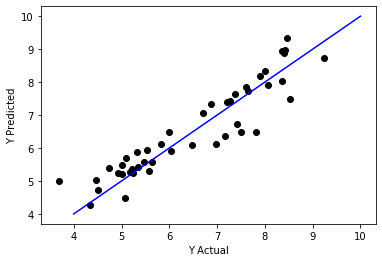

9.229162126216771


In [13]:
y_hat_test = X_test.dot(coef)

#testing compare
compare = pd.DataFrame([])
compare['y_act'] = y_hat_test
compare['y_pred'] = y_test
print(compare)


import matplotlib.pyplot as plt
center_data = np.linspace(4,10,100)
plt.plot(center_data,center_data,'b')
plt.scatter(y_test,y_hat_test,c='black')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.show()

#maximum value in y_predicted
max_val = np.max(compare['y_pred'])
print(max_val)

#Maximum Relative Error Testing

In [14]:
#Maximum Relative Error in Training
max_relative_error_test = np.max(np.abs(y_test - y_hat_test)/y_test)
print(max_relative_error)


0.4146549141097059


#Error row wise of Training set 


In [15]:
error = np.abs(y_hat_train - y_train)/np.abs(y_train)
absolute_error = np.abs(y_hat_train - y_train)
print(error)
print(absolute_error)

converted_data['error'] = error

365    0.018323
101    0.065467
442    0.112430
78     0.089738
33     0.017449
         ...   
106    0.087554
270    0.025771
348    0.057671
435    0.040161
102    0.062808
Length: 404, dtype: float64
365    0.128300
101    0.410665
442    0.843349
78     0.773518
33     0.119455
         ...   
106    0.692088
270    0.147504
348    0.299484
435    0.237057
102    0.433862
Length: 404, dtype: float64


#Number of data points in Relative Error range

In [16]:
defined_error = 0.05
index_collector = []
counter = 0
total_data = X_train.shape[0]
#just counting number of data points

for i in range(len(error)):
  if(error.iloc[i] > defined_error):
    counter += 1

print(counter,'out of ',total_data,',number of data point that has relative error more than ',defined_error)

244 out of  404 ,number of data point that has relative error more than  0.05


#Number of data points in Absolute Error range

In [17]:
defined_error = 0.1
index_collector = []
counter = 0
total_data = X_train.shape[0]

#just counting number of data points

for i in range(len(absolute_error)):
  if(absolute_error.iloc[i] > defined_error):
    counter += 1

print(counter,'out of ',total_data,',number of data point that has relative error more than ',defined_error)

360 out of  404 ,number of data point that has relative error more than  0.1


#Error Based Clustering
- Collect the data points which has less error than defined error into one bin
- Rest of the points into the other bins and repeat the procedure itertively


#Seperated data frames based on ERROR
 


In [18]:
#Clusters
print('Main Cluster size :',X_train.shape)
cluster_1 = converted_data[converted_data['error'] < 0.05]
cluster_2 = converted_data[converted_data['error'] > 0.05]

print('cluster_1 size :',cluster_1.shape)
print('cluster_2 size :',cluster_2.shape)



Main Cluster size : (404, 6)
cluster_1 size : (160, 8)
cluster_2 size : (244, 8)


#Analysis of cluster-1

In [0]:
  X_train_clus_1 = cluster_1.iloc[:,:-2] 
  y_train_clus_1 = cluster_1.iloc[:,-2] 
  coef_cluster_1 = regression(X_train_clus_1,y_train_clus_1)

  #Coefficent table 
  coef_result_clus_1 = pd.DataFrame([])
  coef_result_clus_1['para_coef'] =X_train_clus_1.columns
  coef_result_clus_1['coef'] = coef_cluster_1
  print(coef_result_clus_1)

  #prediction 
  y_hat_train_clus1 = X_train_clus_1.dot(coef_cluster_1)

  #comparing the actual and predicted value 
  compare = pd.DataFrame([])
  compare['y_act'] = y_train_clus_1
  compare['y_pred'] = y_hat_train_clus1
  print(compare)

  import matplotlib.pyplot as plt
  center_data = np.linspace(4,10,100)
  plt.plot(center_data,center_data,'b')
  plt.scatter(y_train,y_hat_train,c='black')
  plt.scatter(y_train_clus_1,y_hat_train_clus1,c='yellow')
  plt.xlabel('Y Actual')
  plt.ylabel('Y Predicted')
  plt.show()

  #maximum relative error in clutser
  max_relative_error_clus1 = np.max(np.abs(y_train_clus_1 - y_hat_train_clus1)/np.abs(y_train_clus_1))
  print('max_relative_error:',max_relative_error)

6
  para_coef       coef
0     const  -2.932180
1      T0/T  12.069944
2  T0/T*S_H   3.788421
3     log_P  -0.574173
4  log_Fuel  -0.276876
5   log_oxi  -0.155951
        y_act    y_pred
3    5.966147  5.723427
4    5.111988  5.320183
6    5.347108  5.149376
11   6.496775  6.443202
12   6.895683  6.670780
..        ...       ...
424  5.062595  4.894044
434  6.777647  6.602974
435  5.902633  6.216782
440  5.932245  5.821984
441  7.154615  6.867382

[160 rows x 2 columns]


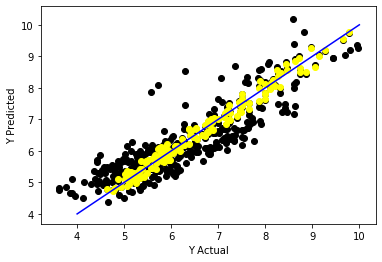

max_relative_error: 0.4146549141097059


In [22]:
X_train_clus_1 = cluster_1.iloc[:,:-2] 
y_train_clus_1 = cluster_1.iloc[:,-2] 
coef_cluster_1 = regression(X_train_clus_1,y_train_clus_1)

#Coefficent table 
coef_result_clus_1 = pd.DataFrame([])
coef_result_clus_1['para_coef'] =X_train_clus_1.columns
coef_result_clus_1['coef'] = coef_cluster_1
print(coef_result_clus_1)

#prediction 
y_hat_train_clus1 = X_train_clus_1.dot(coef_cluster_1)

#comparing the actual and predicted value 
compare = pd.DataFrame([])
compare['y_act'] = y_train_clus_1
compare['y_pred'] = y_hat_train_clus1
print(compare)

import matplotlib.pyplot as plt
center_data = np.linspace(4,10,100)
plt.plot(center_data,center_data,'b')
plt.scatter(y_train,y_hat_train,c='black')
plt.scatter(y_train_clus_1,y_hat_train_clus1,c='yellow')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.show()

#maximum relative error in clutser
max_relative_error_clus1 = np.max(np.abs(y_train_clus_1 - y_hat_train_clus1)/np.abs(y_train_clus_1))
print('max_relative_error:',max_relative_error)


#Analysis  of cluster-2

6
  para_coef       coef
0     const  -2.909813
1      T0/T  12.431288
2  T0/T*S_H   3.298631
3     log_P  -0.503884
4  log_Fuel  -0.129052
5   log_oxi  -0.291827
        y_act    y_pred
0    6.755769  6.085733
1    7.358194  6.515375
2    7.088409  6.338286
5    6.927558  6.131713
7    5.652489  5.363814
..        ...       ...
444  7.192934  6.701532
445  7.192934  6.020977
446  5.730100  6.020977
447  5.634790  5.951065
448  5.241747  5.907128

[244 rows x 2 columns]


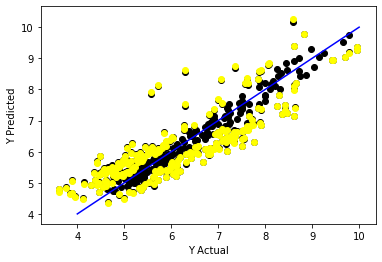

max_relative_error: 0.4146549141097059


In [23]:
X_train_clus_2 = cluster_2.iloc[:,:-2] 
y_train_clus_2 = cluster_2.iloc[:,-2] 
coef_cluster_2 = regression(X_train_clus_2,y_train_clus_2)

#Coefficent table 
coef_result_clus_2 = pd.DataFrame([])
coef_result_clus_2['para_coef'] =X_train_clus_2.columns
coef_result_clus_2['coef'] = coef_cluster_2
print(coef_result_clus_2)

#prediction 
y_hat_train_clus_2 = X_train_clus_2.dot(coef_cluster_2)

#comparing the actual and predicted value 
compare = pd.DataFrame([])
compare['y_act'] = y_train_clus_2
compare['y_pred'] = y_hat_train_clus_2
print(compare)

import matplotlib.pyplot as plt
center_data = np.linspace(4,10,100)
plt.plot(center_data,center_data,'b')
plt.scatter(y_train,y_hat_train,c='black')
plt.scatter(y_train_clus_2,y_hat_train_clus_2,c='yellow')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.show()

#maximum relative error in clutser
max_relative_error_clus1 = np.max(np.abs(y_train_clus_2 - y_hat_train_clus_2)/np.abs(y_train_clus_2))
print('max_relative_error:',max_relative_error)

#Seperating the data points from the cluster
- Regression is fitting the plane 

for given plane $ax+by+cz+d = 0$, \
  if we plug point $(x_1,y_1,z_1)$ and $(x_2,y_2,z_2)$ into the plane and have same sign means they are on same side else they are on other side.
  $ax+by+cz+d = 0$

  $z =-(d/c) -(a/c)x - (b/c)y$

  $z =$ 
  $\begin{bmatrix}
  1 &
  x &
  y
  \end{bmatrix}$
  $\begin{bmatrix}
  -d/c \\
  -a/c \\
  -b/c
  \end{bmatrix}$

  $z =$ 
  $\begin{bmatrix}
  1 &
  x &
  y
  \end{bmatrix}$
  $\begin{bmatrix}
  -d/c \\
  -a/c \\
  -b/c
  \end{bmatrix}$

 $z = Data * coef  $

If data points perfectly satisfy   $ax+by+cz+d = 0$ which means they lie on the else if it is positive means they lie above the plane else below.

same analogy can applied in the regression. If the data point does not satisfy menas it generate more or less of value than  required which can be obtained by +ve or -ve error.

$y_{predicted} - y_{actual} = error$ 

points containg +ve error lie on same side whereas points containing -ve error lie on another side.



In [26]:
cluster_2['error_bifurcation'] =  y_train_clus_2 - y_hat_train_clus_2
print(cluster_2.shape)
cluster_3 =  cluster_2[cluster_2['error_bifurcation'] > 0]
print(cluster_3.shape)
cluster_4 =  cluster_2[cluster_2['error_bifurcation'] < 0]
print(cluster_4.shape)


(244, 9)
(118, 9)
(126, 9)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
